# Making Multiple Markets - Introduction

One of the core concepts of quantitative trading is to create a portfolio by combining multiple assets or strategies to diversify risks. By combining multiple strategies, you can obtain a less volatile portfolio return. In other words, you can achieve a higher Sharpe ratio by combining multiple assets or strategies. Even if your individual strategy's Sharpe ratio is low, constructing a portfolio with multiple assets or strategies can result in a higher Sharpe ratio for the combined portfolio. You can see how this works with the following straightforward example, without complex mathematics.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def compute_equity(returns, intial_equity, bet_size):
    return intial_equity + np.cumsum(bet_size * returns, axis=0)

mean = 0.001
std = 0.05
risk_free_rate = 0.04 / 252
sharpe_ratio = (mean - risk_free_rate) / std * np.sqrt(252)

print(f'The Sharpe Ratio for each individual strategy or asset: {sharpe_ratio:.2f}')

num_periods = 252
intial_equity = 10000
bet_size = 10000
num_assets_or_num_strat = 1000

# Generates series of random returns with a normal distribution.
returns = np.random.normal(mean, std, (num_periods, num_assets_or_num_strat))

# Initializes the starting point at zero.
returns[0, :] = 0

equity_series = compute_equity(returns, intial_equity, bet_size)

The Sharpe Ratio for each individual strategy or asset: 0.27


Here, it creates a series of random returns with a low target Sharpe ratio. In the following graphs, it is difficult to determine if the individual strategy is effective.

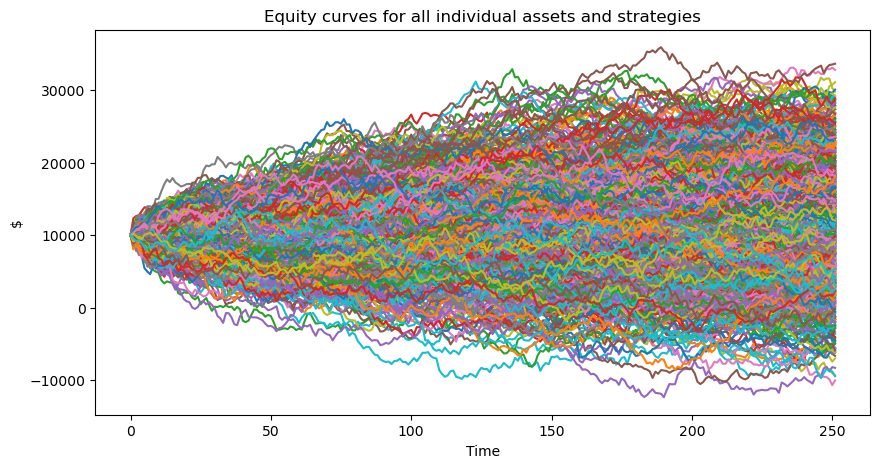

In [2]:
plt.figure(figsize=(10, 5))
plt.title('Equity curves for all individual assets and strategies')
plt.xlabel('Time')
plt.ylabel('$')
_ = plt.plot(equity_series)

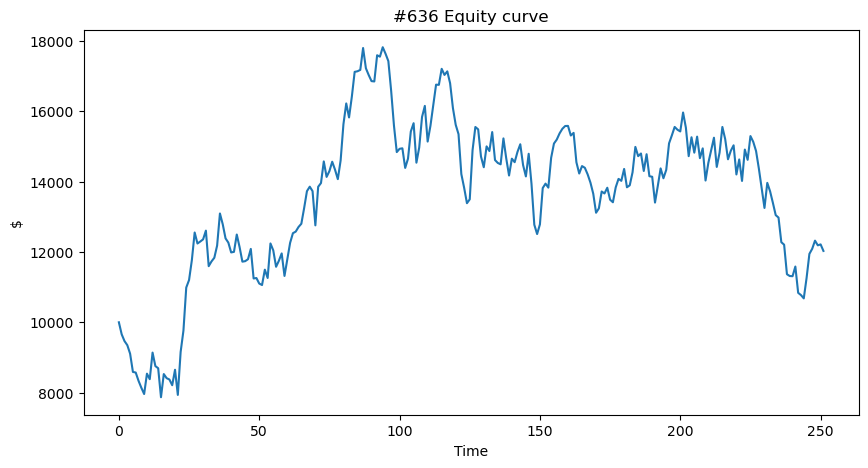

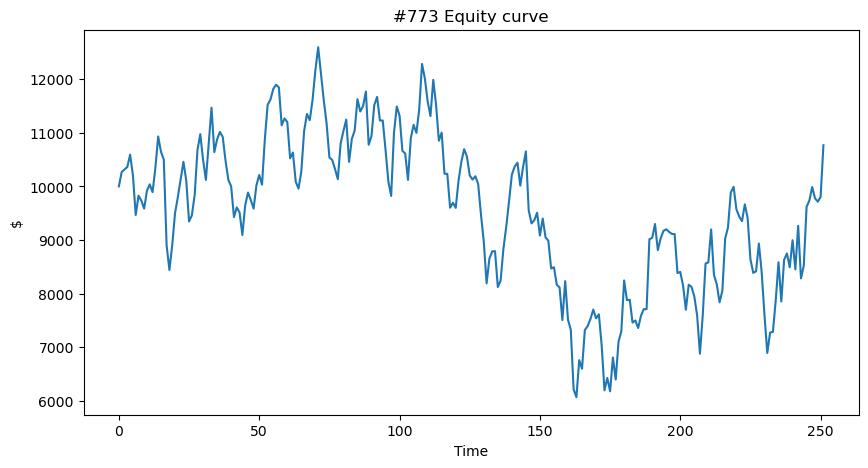

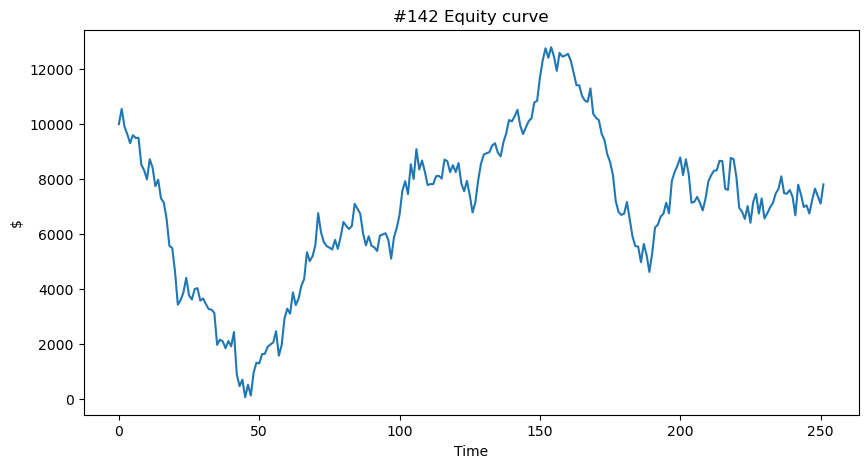

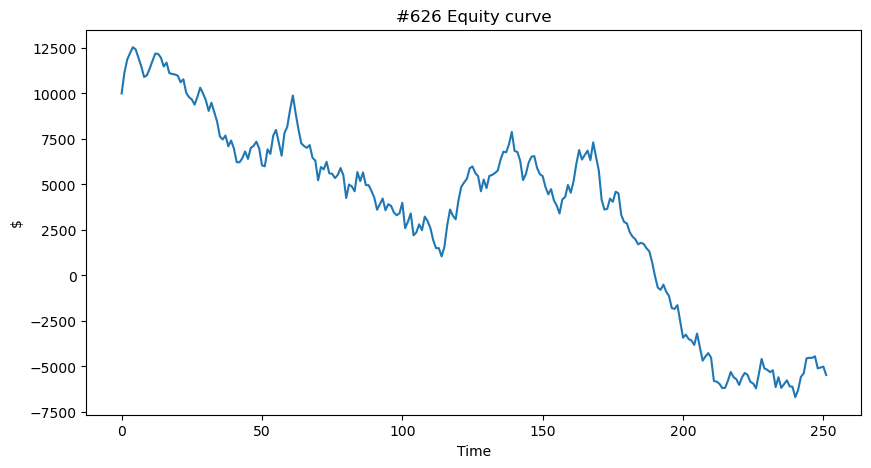

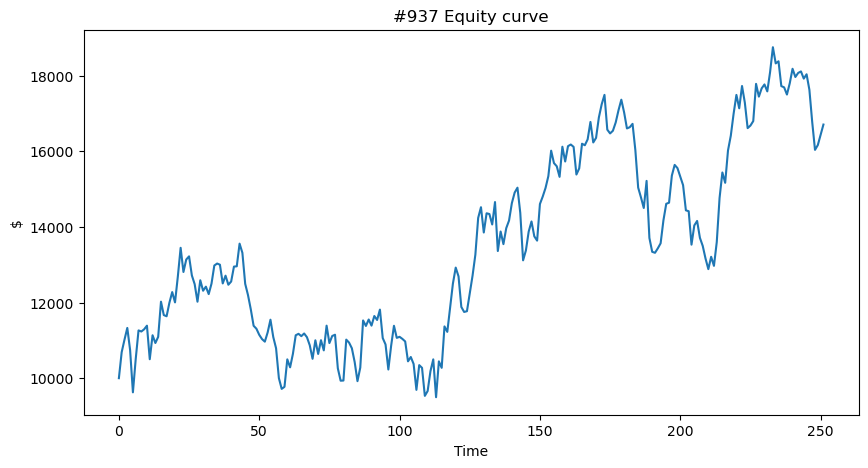

In [3]:
for i in np.random.randint(num_assets_or_num_strat, size=5):
    plt.figure(i, figsize=(10, 5))
    plt.title(f'#{i} Equity curve')
    plt.xlabel('Time')
    plt.ylabel('$')
    plt.plot(equity_series[:, i])

However, by combining multiple individual assets or strategies into a portfolio and plotting the portfolio's equity curve and Sharpe ratio, you can observe a higher Sharpe ratio and a more linear equity curve as you combine more. The more assets or strategies are combined, the higher the Sharpe ratio becomes.

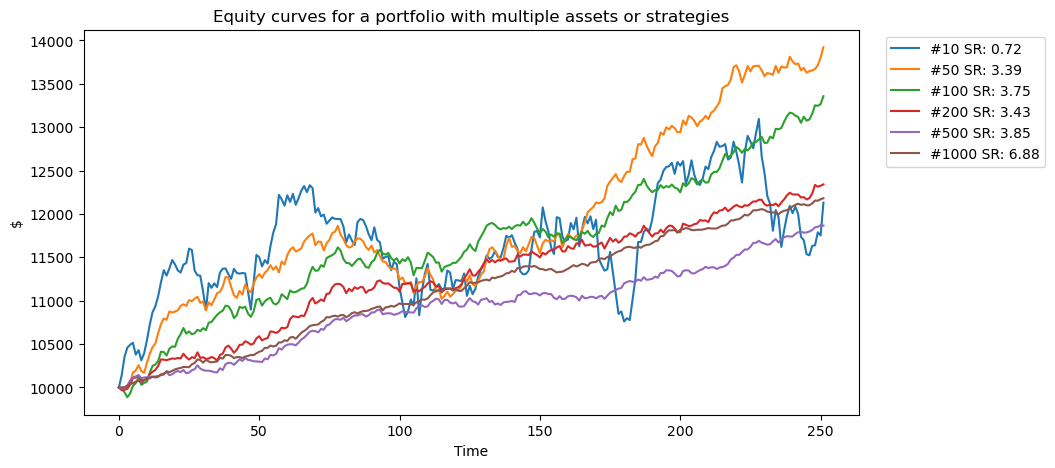

In [4]:
sharpe_ratio = []

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)

for sum_num_assets_or_num_strat in [10, 50, 100, 200, 500, 1000]:
    # Normalizes by dividing by the number of combined assets or strategies.
    portfolio_equity = np.sum(equity_series[:, :sum_num_assets_or_num_strat], axis=1) / sum_num_assets_or_num_strat
    ret = np.diff(portfolio_equity) / bet_size
    
    ax.plot(portfolio_equity)
    sharpe_ratio.append(f'#{sum_num_assets_or_num_strat} SR: {(np.mean(ret) - risk_free_rate) / np.std(ret) * np.sqrt(252):.2f}')

ax.set_title('Equity curves for a portfolio with multiple assets or strategies')
ax.set_xlabel('Time')
ax.set_ylabel('$')
ax.legend(sharpe_ratio, loc='upper right', bbox_to_anchor=(1.25, 1))

Sharpe ratio of a portfolio combining all 1000 assets or strategies: 6.88


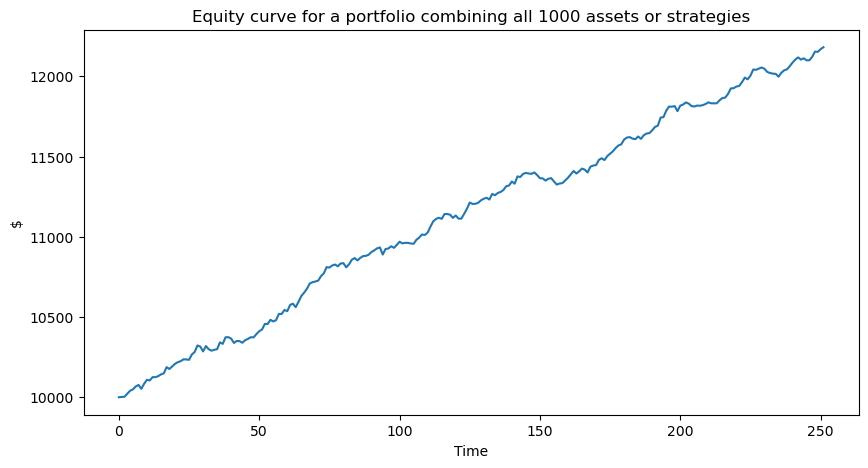

In [5]:
sharpe_ratio = []

plt.figure(figsize=(10, 5))

portfolio_equity = np.sum(equity_series, axis=1) / num_assets_or_num_strat
ret = np.diff(portfolio_equity) / bet_size
    
plt.plot(portfolio_equity)
plt.title(f'Equity curve for a portfolio combining all {num_assets_or_num_strat} assets or strategies')
plt.xlabel('Time')
plt.ylabel('$')

sr = (np.mean(ret) - risk_free_rate) / np.std(ret) * np.sqrt(252)
print(f'Sharpe ratio of a portfolio combining all {num_assets_or_num_strat} assets or strategies: {sr:.2f}')

One important factor to consider is **the correlation** of returns between assets or strategies. The higher the correlation, the less effective the portfolio will be.

In [6]:
def generate_correlated_returns(num_periods, correlation, mean, std, num):
    uncorrelated_returns = np.random.normal(mean, std, (num, num_periods))
    
    corr_matrix = np.ones((num, num), np.float64) * correlation
    for i in range(num):
        corr_matrix[i, i] = 1.0
    
    L = np.linalg.cholesky(corr_matrix)
    
    correlated_returns = np.dot(L, uncorrelated_returns)
    
    return np.transpose(correlated_returns)

In [7]:
correlation = 0.25

ret = generate_correlated_returns(num_periods, correlation, mean, std, num_assets_or_num_strat)

# Initializes the starting point at zero.
ret[0, :] = 0

equity_series = compute_equity(ret, intial_equity, bet_size)

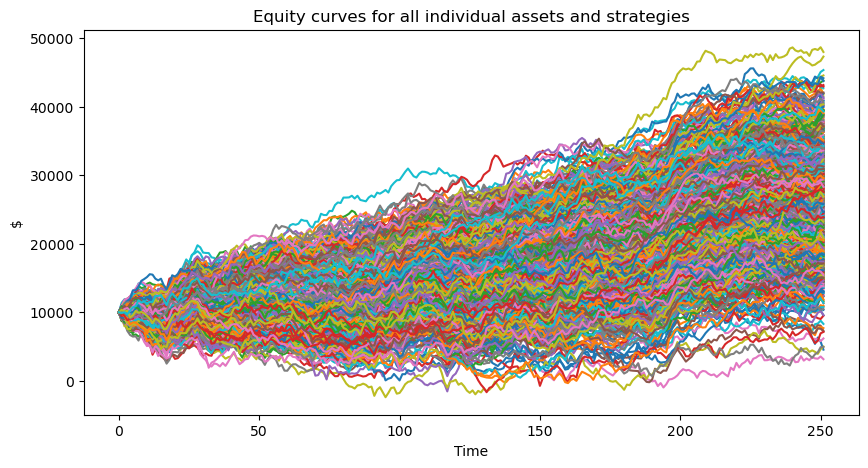

In [8]:
plt.figure(figsize=(10, 5))
plt.title('Equity curves for all individual assets and strategies')
plt.xlabel('Time')
plt.ylabel('$')
_ = plt.plot(equity_series)

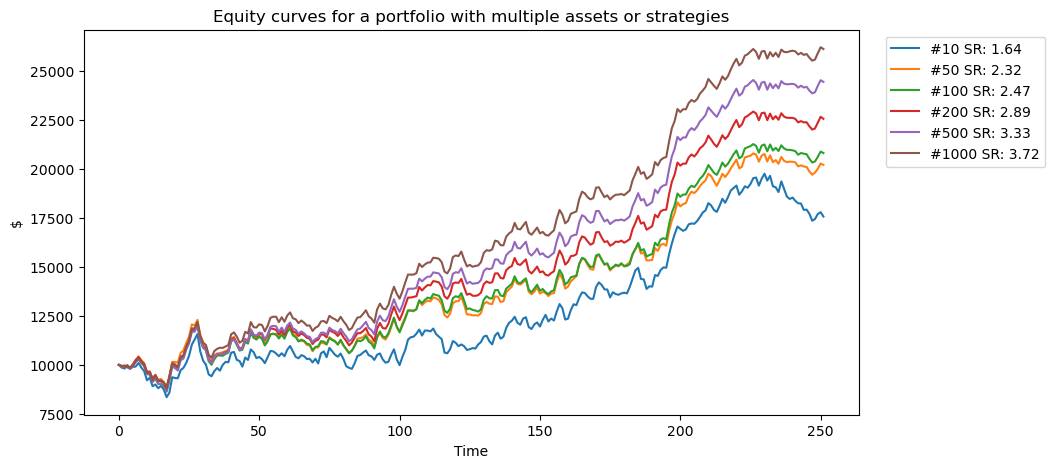

In [9]:
sharpe_ratio = []

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)

for sum_num_assets_or_num_strat in [10, 50, 100, 200, 500, 1000]:
    # Normalizes by dividing by the number of combined assets or strategies.
    portfolio_equity = np.sum(equity_series[:, :sum_num_assets_or_num_strat], axis=1) / sum_num_assets_or_num_strat
    ret = np.diff(portfolio_equity) / bet_size
    
    ax.plot(portfolio_equity)
    sharpe_ratio.append(f'#{sum_num_assets_or_num_strat} SR: {(np.mean(ret) - risk_free_rate) / np.std(ret) * np.sqrt(252):.2f}')

ax.set_title('Equity curves for a portfolio with multiple assets or strategies')
ax.set_xlabel('Time')
ax.set_ylabel('$')
ax.legend(sharpe_ratio, loc='upper right', bbox_to_anchor=(1.25, 1))

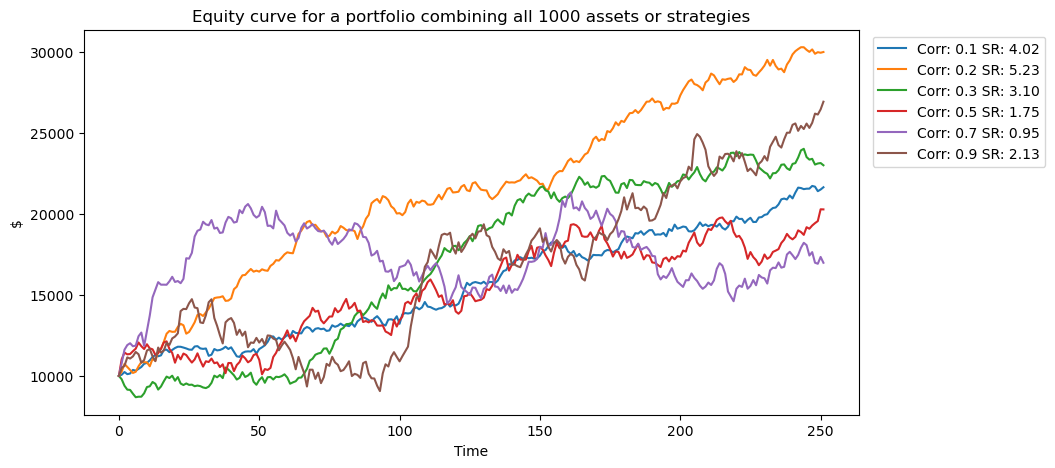

In [10]:
sharpe_ratio = []

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)

for correlation in [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]:
    ret = generate_correlated_returns(num_periods, correlation, mean, std, num_assets_or_num_strat)

    # Initializes the starting point at zero.
    ret[0, :] = 0
    
    equity_series = compute_equity(ret, intial_equity, bet_size)
    
    portfolio_equity = np.sum(equity_series, axis=1) / num_assets_or_num_strat
    ret = np.diff(portfolio_equity) / bet_size
    
    ax.plot(portfolio_equity)
    sharpe_ratio.append(f'Corr: {correlation} SR: {(np.mean(ret) - risk_free_rate) / np.std(ret) * np.sqrt(252):.2f}')

ax.set_title(f'Equity curve for a portfolio combining all {num_assets_or_num_strat} assets or strategies')
ax.set_xlabel('Time')
ax.set_ylabel('$')
ax.legend(sharpe_ratio, loc='upper right', bbox_to_anchor=(1.25, 1))